# TP 4
#### Para las imágenes suministradas:
1. Implementar un extractor de características LBP básico (sin uniformidad, 8 vecinos).
2. Realizar el histograma de características LBP de la imagen.
3. Comparar los histogramas.

In [75]:
%matplotlib inline  

import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
import os

In [76]:
# Funcion para la carga de múltiples imágenes
# Recibe como entrada el path relativo al directorio donde se encuentran la imágenes a cargar
def load_images_from_folder(folder):
    images = []
    for filename in os.listdir(folder):
        img = cv.imread(os.path.join(folder,filename))
        if img is not None:
            images.append(img)
    return images


# Funcion para filtrado LBP
# Recibe como entrada una imagen en escala de grises y entrega la imagen con filtrado LBP
def lbp_filter(img_gray):    
    img_lbp             = np.zeros((img_gray.shape[0],img_gray.shape[1]), dtype = int)
    neighboor_array_row = 3 
    pow_exp             = np.arange(2**neighboor_array_row)
    pow_base            = np.repeat(2,2**neighboor_array_row)
    
    for i in range(0,img_gray.shape[0] - neighboor_array_row):
        for j in range(0,img_gray.shape[1] - neighboor_array_row):
            img_3x3             = img_gray[i:i+neighboor_array_row,j:j+neighboor_array_row]
            center              = img_3x3[1,1]
            img_3x3_mask        = np.where(img_3x3 >= center, 1, 0)
            img_3x3_mask_concat = img_3x3_mask.T.flatten()
            img_3x3_mask_concat = np.delete(img_3x3_mask_concat,4)
            pow_exp_masked      = np.where(img_3x3_mask_concat == 1, pow_exp, 1)
            pow_base_masked     = np.where(img_3x3_mask_concat == 1, pow_base, 0)
            pow_array           = pow_base_masked**pow_exp_masked
            img_lbp[i+1,j+1]    = np.sum(pow_base**pow_exp_masked)
    return img_lbp

In [77]:
# Carga de imágenes
path = 'images/'
images = load_images_from_folder(path)

In [78]:
# Procesamiento de imágenes
# Filtrado LBP y cálculo del histograma

amount_img = len(images)
images_rgb = []
images_lbp = []
histograms = []

for i in range(len(images)):
    img_rgb     = cv.cvtColor(images[i],cv.COLOR_BGR2RGB)
    img_gray    = cv.cvtColor(images[i],cv.COLOR_BGR2GRAY)
    img_lbp     = lbp_filter(img_gray)
    images_rgb.append(img_rgb)
    images_lbp.append(img_lbp)
    n_bins = int(img_lbp.max() + 1)
    hist, bins = np.histogram(img_lbp, density=True, bins=n_bins, range=(0, n_bins))
    histograms.append(hist)

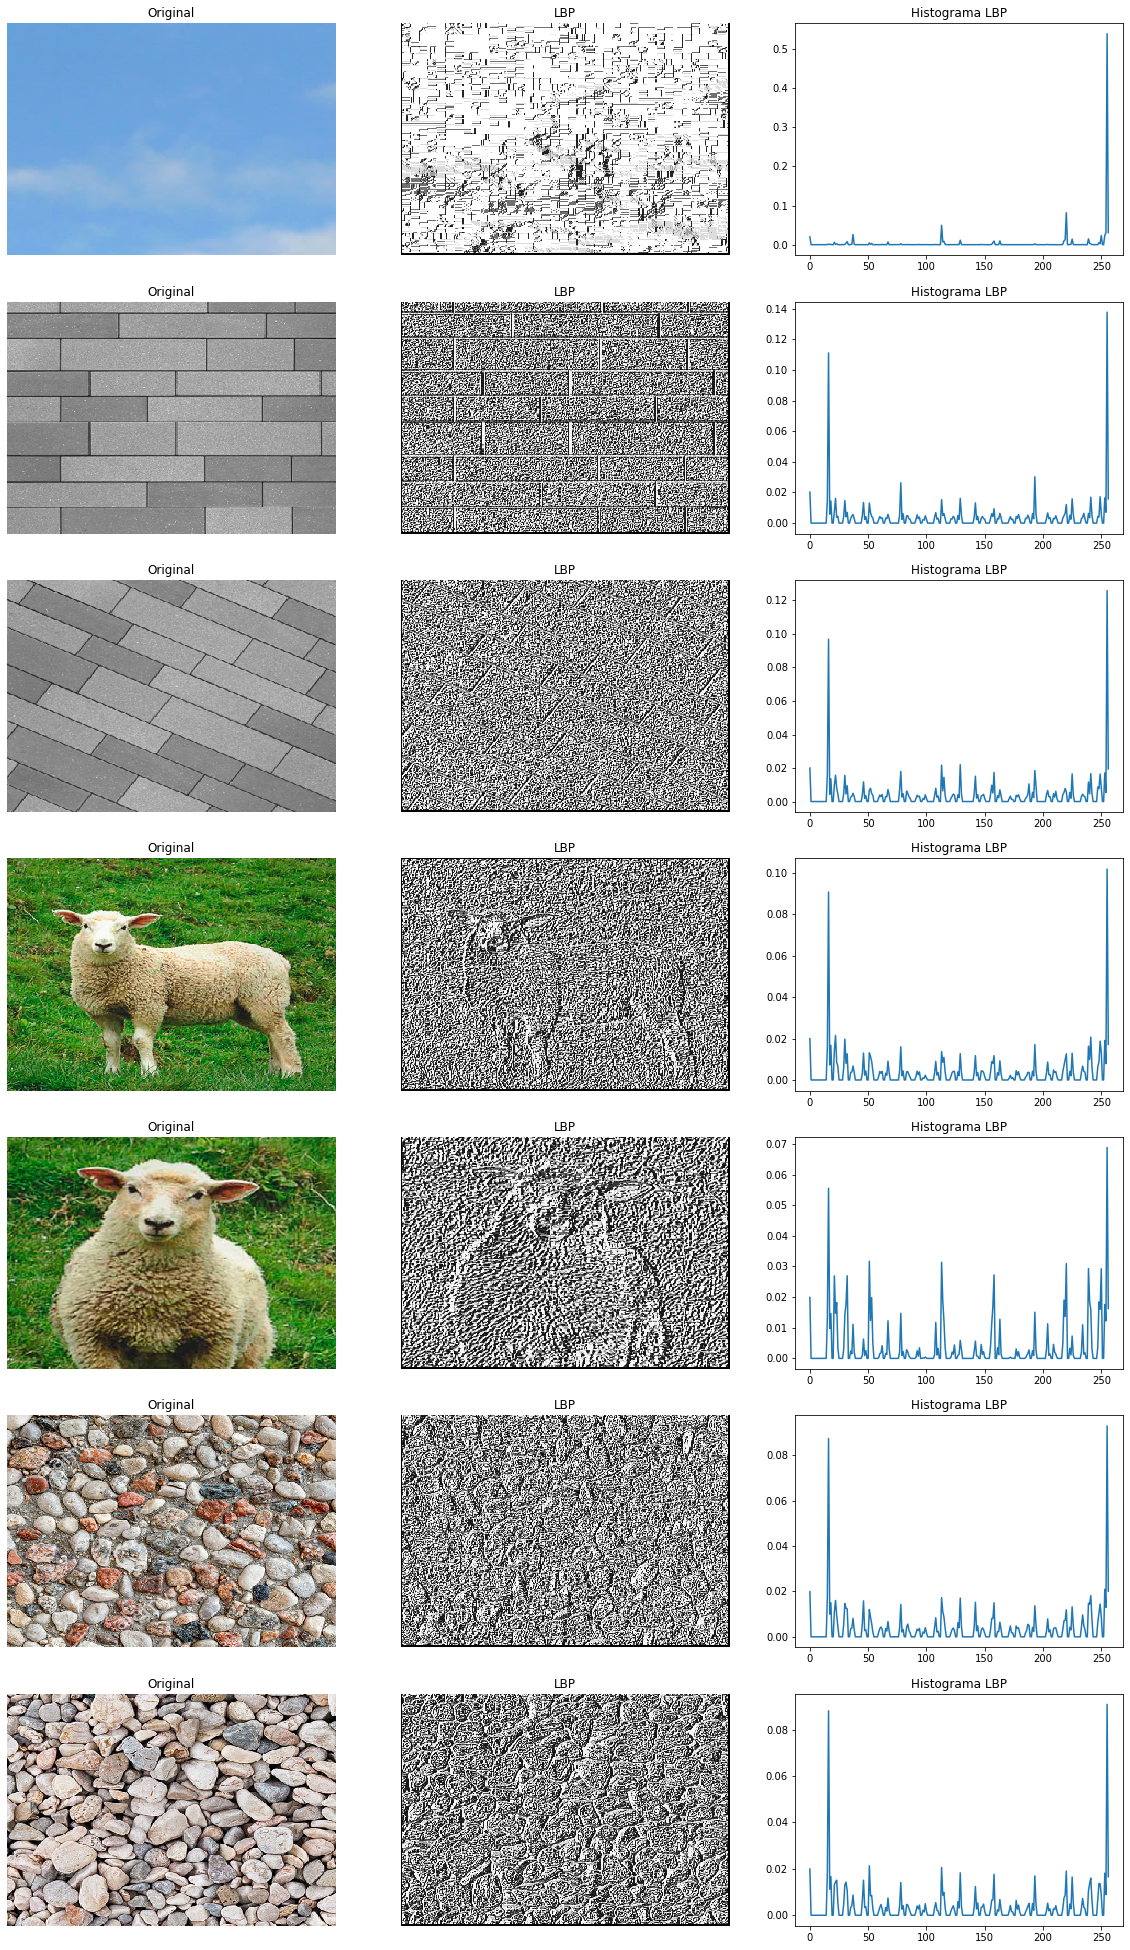

In [79]:
# Visualización de las imágenes procesadas y sus histogramas

fig, ax = plt.subplots(amount_img,3,figsize=(20,5*amount_img))

for i in range(amount_img):

    ax[i][0].imshow(images_rgb[i],aspect='auto')
    ax[i][0].set_title("Original")
    ax[i][0].axis('off')
    
    ax[i][1].imshow(images_lbp[i], aspect='auto', cmap='gray', vmin=0, vmax=255)
    ax[i][1].set_title("LBP")
    ax[i][1].axis('off')

    ax[i][2].plot(histograms[i])
    ax[i][2].set_title("Histograma LBP")
    ax[i][2].axis('on')    

plt.show()